We are going to be doing an activity about viewing images through different filters. These filters are similar to things that happen in the brain when the images from our eyes are registered in our brain.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.image as mpimg
import scipy.signal as signal
import numpy as n
import math
import urllib

Here is an example of a picture that is only in black and white

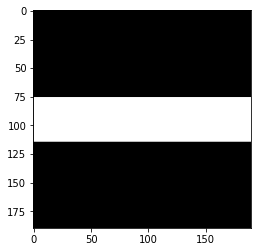

In [2]:
barImg=mpimg.imread('bar.png')
barImg = barImg[:,:,3]
imgplot = plt.imshow(barImg, cmap=cm.Greys_r)

In [3]:
img=mpimg.imread('stinkbug.png')
#extract grey values
bugImg = img[:,:,0]

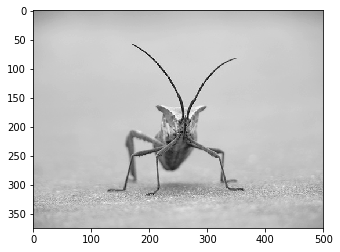

In [4]:
imgplot = plt.imshow(bugImg, cmap=cm.Greys_r)

Receptive field functions
-------------------

 In the visual pathway the images can be seen as input from our eyes focusing on the center of our vision. This is the equation for it (you don't need to know this!)

$$\phi(x,y) = \frac{1}{2\pi\sigma^2}\exp{(-\frac{1}{2\pi\sigma^2}(x^2+ y^2))}$$

In [5]:
def gaussian2D(x, y, sigma):
    return (1.0/(1*math.pi*(sigma**2)))*math.exp(-(1.0/(2*(sigma**2)))*(x**2 + y**2))

"""make matrix from function"""
def receptiveFieldMatrix(func):
    h = 30
    g = n.zeros((h,h))
    for xi in range(0,h):
        for yi in range(0,h):
            x = xi-h/2
            y = yi-h/2
            g[xi, yi] = func(x,y);
    return g

def plotFilter(fun):
    g = receptiveFieldMatrix(fun) 
    plt.imshow(g, cmap=cm.Greys_r)

The gaussian function is circular symmetric, meaning it is doing the same thing around a circle. This graph will help give you an idea of what it is doing.
<img src="files/gaus3D.png">

This filter cancels out higher frequencies, thus blurring the image.

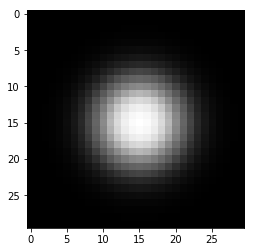

In [6]:
plotFilter(lambda x,y:gaussian2D(x,y,4))


Convolution is the process of applying the filter to the input image.
$$\int \int I(x',y')\phi(x-x',y-y')dx'dy'$$
The following image shows a simple graph of what convolution is.
<img src="files/Comparison_convolution_correlation.svg.png">

When applying this filter, the result of the convolution can be visualized in an image. 



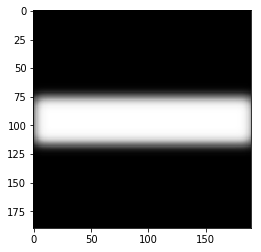

In [7]:
Img_barGaussian = signal.convolve(barImg,receptiveFieldMatrix(lambda x,y: gaussian2D(x,y,5)), mode='same')

imgplot = plt.imshow(Img_barGaussian, cmap=cm.Greys_r)

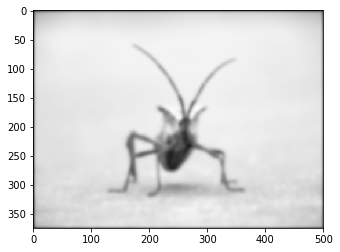

In [8]:
Img_bugGaussian = signal.convolve(bugImg,receptiveFieldMatrix(lambda x,y: gaussian2D(x,y,3)), mode='same')
imgplot = plt.imshow(Img_bugGaussian, cmap=cm.Greys_r)

Difference of Gaussians
---------------------

The mexican hat function is a difference between two of the function above, which leads to a filter that happens in certain cells in your eye. It can be seen as a basic edge detector.

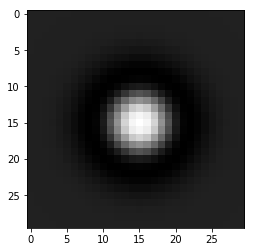

In [9]:
def mexicanHat(x,y,sigma1,sigma2): 
    return gaussian2D(x,y,sigma1) - gaussian2D(x,y,sigma2)

plotFilter(lambda x,y: mexicanHat(x,y,3,4))

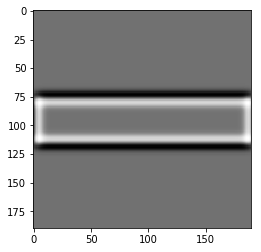

In [10]:
Img_barHat = signal.convolve(barImg,receptiveFieldMatrix(lambda x,y:mexicanHat(x,y,3,4)), mode='same')

imgplot = plt.imshow(Img_barHat, cmap=cm.Greys_r)

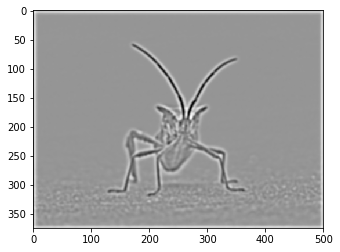

In [11]:
Img_bugHat = signal.convolve(bugImg,receptiveFieldMatrix(lambda x,y: mexicanHat(x,y,2,3)), mode='same')

imgplot = plt.imshow(Img_bugHat, cmap=cm.Greys_r)

Gabor functions
---------------

Gabor functions are used to detect edges with a specific orientation in images. There are parts in the brain that see an image through these gabor functions and are found throughout a part of your eye.

 There are two different types of gabor function:
 $$g_s(x):=sin(\omega_x x + \omega_y y)\exp{\{-\frac{x^2+y^2}{2\sigma^2}\}}$$
 $$g_c(x):=cos(\omega_x x + \omega_y y)\exp{\{-\frac{x^2+y^2}{2\sigma^2}\}}$$



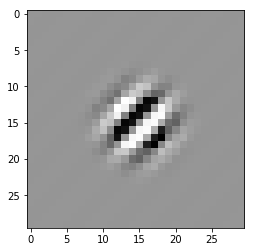

In [12]:
def oddGabor2D(x,y,sigma,orientation):
    return math.sin(x + orientation*y) * math.exp(-(x**2 + y**2)/(2*sigma))

def evenGabor2D(x,y, sigma, orientation):
    return math.cos(x + orientation*y) * math.exp(-(x**2 + y**2)/(2*sigma))

plotFilter(lambda x,y: oddGabor2D(x,y,7,1))

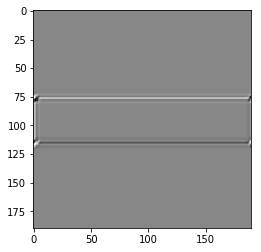

In [13]:
Img_barOddGabor = signal.convolve(barImg,receptiveFieldMatrix(lambda x,y: oddGabor2D(x,y,5,1)), mode='same')

imgplot = plt.imshow(Img_barOddGabor, cmap=cm.Greys_r)

In [14]:
Img_bugOddGabor = signal.convolve(bugImg,receptiveFieldMatrix(lambda x,y: oddGabor2D(x,y,5,1)), mode='same')

In the following image one can see the edge orientations appear in the part of the eye.

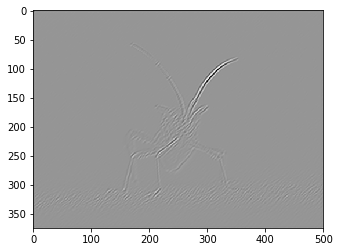

In [15]:
imgplot = plt.imshow(Img_bugOddGabor, cmap=cm.Greys_r)

Using the previous filter (the edge defining one) as an input to the gabor we obtain different results.

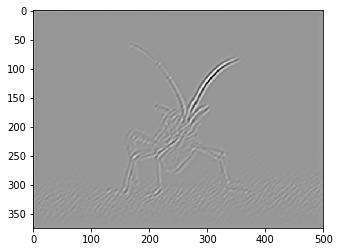

In [16]:
Img_bugOddGaborEdge = signal.convolve(Img_bugHat,receptiveFieldMatrix(lambda x,y: oddGabor2D(x,y,5,1)), mode='same')

imgplot = plt.imshow(Img_bugOddGaborEdge, cmap=cm.Greys_r)

Here is an example of the other gabor filter

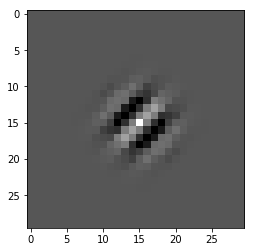

In [17]:
plotFilter(lambda x,y: evenGabor2D(x,y,7,1))

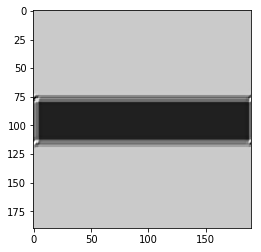

In [18]:
Img_barEvenGabor = signal.convolve(barImg,receptiveFieldMatrix(lambda x,y: evenGabor2D(x,y,5,1)), mode='same')

imgplot = plt.imshow(Img_barEvenGabor, cmap=cm.Greys_r)

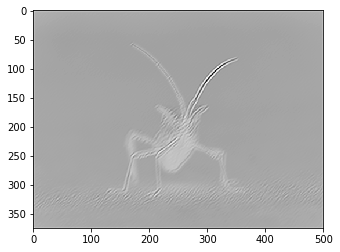

In [19]:
Img_bugEvenGabor = signal.convolve(bugImg,receptiveFieldMatrix(lambda x,y: evenGabor2D(x,y,5,1)), mode='same')

imgplot = plt.imshow(Img_bugEvenGabor, cmap=cm.Greys_r)

Quadrature Pairs
------------------

Now let's combine both gabor filters to see what will happen. 

In [20]:
def edgeEnergy(x,y,sigma, orientation):
    g1= oddGabor2D(x,y,sigma,orientation)
    g2= evenGabor2D(x,y,sigma,orientation)
    return(g1**2+g2**2)


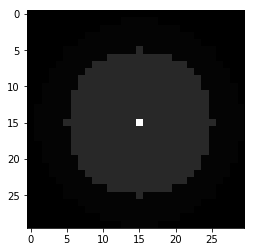

In [21]:
plotFilter(lambda x,y:edgeEnergy(x,y,50,0))

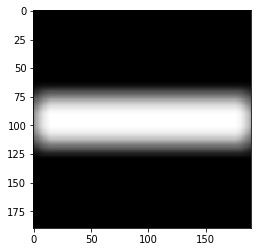

In [22]:
Img_barEdgeEnergy = signal.convolve(barImg,receptiveFieldMatrix(lambda x,y: edgeEnergy(x,y,100,1)), mode='same')
imgplot = plt.imshow(Img_barEdgeEnergy, cmap=cm.Greys_r)

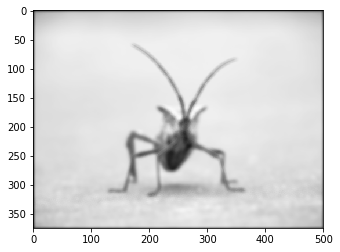

In [23]:
Img_bugEdgeEnergy = signal.convolve(bugImg,receptiveFieldMatrix(lambda x,y: edgeEnergy(x,y,10,1)), mode='same')
imgplot = plt.imshow(Img_bugEdgeEnergy, cmap=cm.Greys_r)

In [24]:
img=mpimg.imread('stinkbug.png')
#extract grey values
bugImg = img[:,:,0]

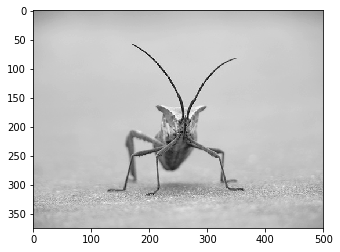

In [25]:
#grey image
imgplot = plt.imshow(bugImg, cmap=cm.Greys_r)

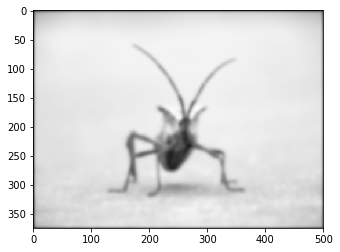

In [26]:
#first filter to blur out sides of vision
Img_bugGaussian = signal.convolve(bugImg,receptiveFieldMatrix(lambda x,y: gaussian2D(x,y,3)), mode='same')
imgplot = plt.imshow(Img_bugGaussian, cmap=cm.Greys_r)

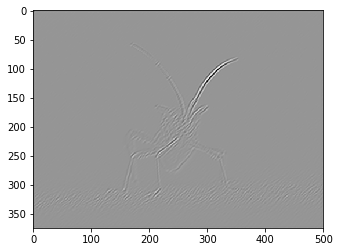

In [27]:
#odd gabor
Img_bugOddGabor = signal.convolve(bugImg,receptiveFieldMatrix(lambda x,y: oddGabor2D(x,y,5,1)), mode='same')
imgplot = plt.imshow(Img_bugOddGabor, cmap=cm.Greys_r)

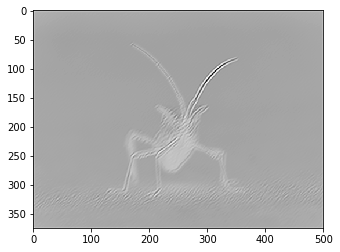

In [28]:
#even gabor
Img_bugEvenGabor = signal.convolve(bugImg,receptiveFieldMatrix(lambda x,y: evenGabor2D(x,y,5,1)), mode='same')

imgplot = plt.imshow(Img_bugEvenGabor, cmap=cm.Greys_r)

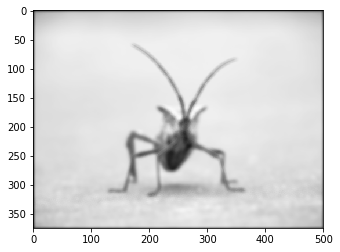

In [29]:
#combining both gabor -- quadrature pair
Img_bugEdgeEnergy = signal.convolve(bugImg,receptiveFieldMatrix(lambda x,y: edgeEnergy(x,y,10,1)), mode='same')
imgplot = plt.imshow(Img_bugEdgeEnergy, cmap=cm.Greys_r)

Your Assignment
------------------

In this assignment, you will use the functions we have shown you to apply filters to some images we have provided.

The images
------------------
doge.png
<br>
jaguar.png
<br>
leopard.png
<br>
zebra.png

TASK: Display one of these images (type your code in the next open box and then hit shift+enter to run it).
<br>
Recall that to display the bug image we used the following code:


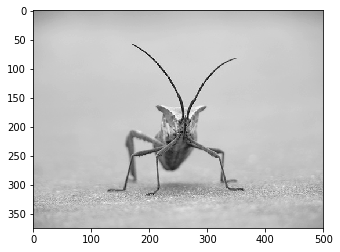

In [30]:
img=mpimg.imread('stinkbug.png')
#extract grey values
bugImg = img[:,:,0]
imgplot = plt.imshow(bugImg, cmap=cm.Greys_r)

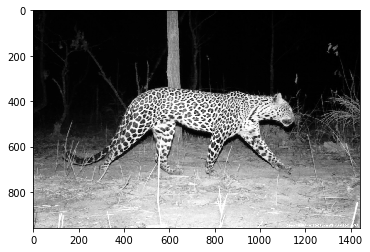

In [34]:
img=mpimg.imread('leopard.png')
#extract grey values
dogImg = img[:,:,0]
imgplot = plt.imshow(dogImg, cmap=cm.Greys_r)

Notice that we set "cmap=cm.Greys_r". This filters the image so that we only see the grey values.
<br>
TASK: Apply a new color map to your previous image (Type your code below).
<br>
Go to this link https://matplotlib.org/examples/color/colormaps_reference.html for a list of choices.

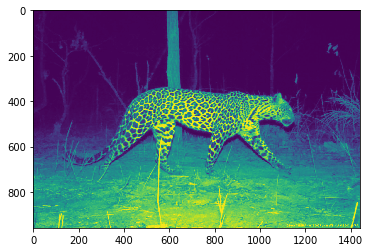

In [45]:
img=mpimg.imread('leopard.png')
#extract grey values
dogImg = img[:,:,0]
imgplot = plt.imshow(dogImg, cmap=cm.viridis)

Now that we can upload an image and change its color filter, let's try using some of the filters we looked at earlier.
<br>
TASK: Apply the different mathematical filters that we looked at to your image.
<br>
<br>
They are:
<br>
gaussian2D(x,y,3)
<br>
mexicanHat(x,y,2,3)
<br>
oddGabor2D(x,y,5,1)
<br>
evenGabor2D(x,y,5,1)
<br>
edgeEnergy(x,y,10,11)

Hint: for the bug image, we applied a filter using the following code.

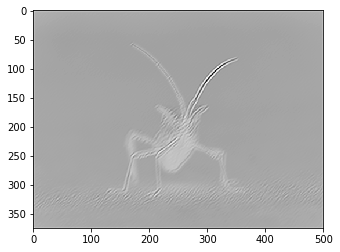

In [34]:
Img_bugEvenGabor = signal.convolve(bugImg,receptiveFieldMatrix(lambda x,y: evenGabor2D(x,y,5,1)), mode='same')

imgplot = plt.imshow(Img_bugEvenGabor, cmap=cm.Greys_r)

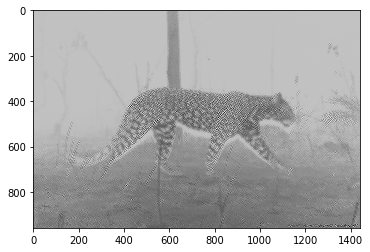

In [50]:
#Put your code for even gabor here
doggy = signal.convolve(dogImg,receptiveFieldMatrix(lambda x,y: evenGabor2D(x,y,5,1)), mode='same')

imgplot = plt.imshow(doggy, cmap=cm.Greys_r)

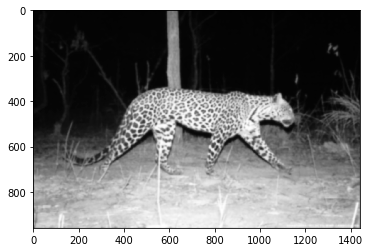

In [47]:
# Put your code for gaussian here
doggy = signal.convolve(dogImg,receptiveFieldMatrix(lambda x,y: gaussian2D(x,y,3)), mode='same')

imgplot = plt.imshow(doggy, cmap=cm.Greys_r)

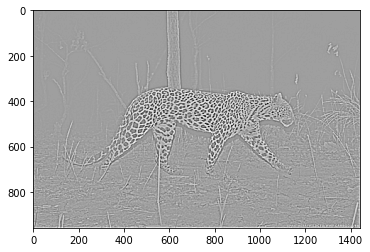

In [48]:
# Put your code for mexican hat here
doggy = signal.convolve(dogImg,receptiveFieldMatrix(lambda x,y: mexicanHat(x,y,2,3)) , mode='same')

imgplot = plt.imshow(doggy, cmap=cm.Greys_r)

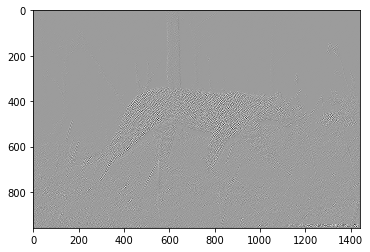

In [49]:
# Put your code for odd gabor here
doggy = signal.convolve(dogImg,receptiveFieldMatrix(lambda x,y: oddGabor2D(x,y,5,1)), mode='same')

imgplot = plt.imshow(doggy, cmap=cm.Greys_r)

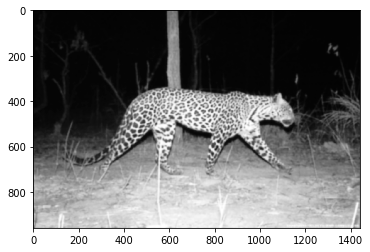

In [54]:
# Put your code for edge energy here
doggy = signal.convolve(dogImg,receptiveFieldMatrix(lambda x,y: edgeEnergy(x,y,10,11)), mode='same')

imgplot = plt.imshow(doggy, cmap=cm.Greys_r)

TASK: Now that you know how to change filters for images, try and apply different filters/colors to the other pictures we have provided. Write down your observations about what happens when you apply different filters to different images. (If you would like to add more blocks to write code in use "Insert -> Cell Below")

Let's look at some images that trick our eyes . Consider this optical illusion. It appears to be "swirling" because its design takes advantage of how our brains process images.
<img src="files/illusion.png">
TASK: If we apply image filters we can break the illusion. Try using different filters (colors or mathematical ones) to make the image appear to stop swirling.


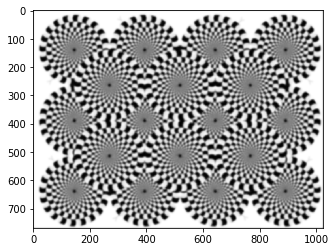

In [37]:
# upload the illusion png
illusion = mpimg.imread('illusion.png')
illusionImg = illusion[:,:,0]

# Put your code here
ill = signal.convolve(illusionImg,receptiveFieldMatrix(lambda x,y: gaussian2D(x,y,3)), mode='same')

imgplot = plt.imshow(ill, cmap=cm.Greys_r)

TASK: Try the same thing for this illusion
<img src="files/illusion2.png">


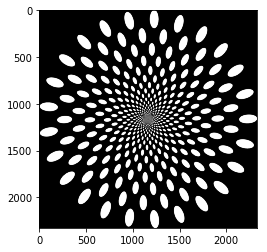

In [38]:
#upload illusion
illusion = mpimg.imread('illusion2.png')
illusionImg = illusion[:,:,0]
# Put your code here
ill = signal.convolve(illusionImg,receptiveFieldMatrix(lambda x,y: gaussian2D(x,y,3)), mode='same')

imgplot = plt.imshow(ill, cmap=cm.Greys_r)

Finally, let's look at some ways animals see images and see if we can model them (as well as we can). 

Dogs see images differently than us. They pick up a different part of the light spectrum and their vision is blurrier. You can read more about this here. https://dog-vision.com/ Here is an example of dog vision.
<img src="files/dogVision.png">
TASK: Try and modify the image below so that it is in "dog vision"


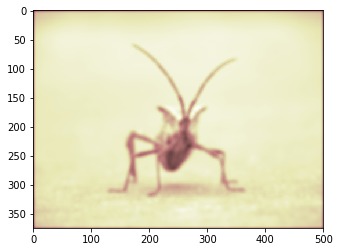

In [56]:
img=mpimg.imread('stinkbug.png')
bugImg = img[:,:,0]
imgplot = plt.imshow(bugImg)
#Put your code here
#combining both gabor -- quadrature pair
Img_bugEdgeEnergy = signal.convolve(bugImg,receptiveFieldMatrix(lambda x,y: edgeEnergy(x,y,10,1)), mode='same')
# No python colormaps are that great for this one
imgplot = plt.imshow(Img_bugEdgeEnergy, cmap=cm.pink)

Bees see different than us aswell. They can also pick up ultraviolet light. You can also read about this here: http://www.beeculture.com/bees-see-matters/
<br>
Here is an example
<img src="files/maxresdefault.png">
TASK: Modify the image below to be in "bee vision"

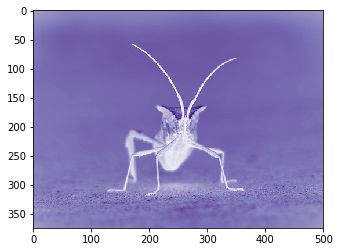

In [55]:
img=mpimg.imread('stinkbug.png')
bugImg = img[:,:,0]
imgplot = plt.imshow(bugImg)
# No python colormaps are that great for this one
imgplot = plt.imshow(bugImg, cmap=cm.Purples)

If you get here, feel free to look up more types of animal visions. Check out this link! http://morgana249.blogspot.com/2014/07/10-examples-of-how-animals-see-images.html Or keep trying out different filters on different images.